In [1]:
import pandas as pd

In [30]:
df_svy1=pd.read_csv('https://cocl.us/datascience_survey_data',index_col=0)
df_svy1

Very interested  Somewhat interested  \
Big Data (Spark / Hadoop)              1332                  729   
Data Analysis / Statistics             1688                  444   
Data Journalism                         429                 1081   
Data Visualization                     1340                  734   
Deep Learning                          1263                  770   
Machine Learning                       1629                  477   

                            Not interested  
Big Data (Spark / Hadoop)              127  
Data Analysis / Statistics              60  
Data Journalism                        610  
Data Visualization                     102  
Deep Learning                          136  
Machine Learning                        74

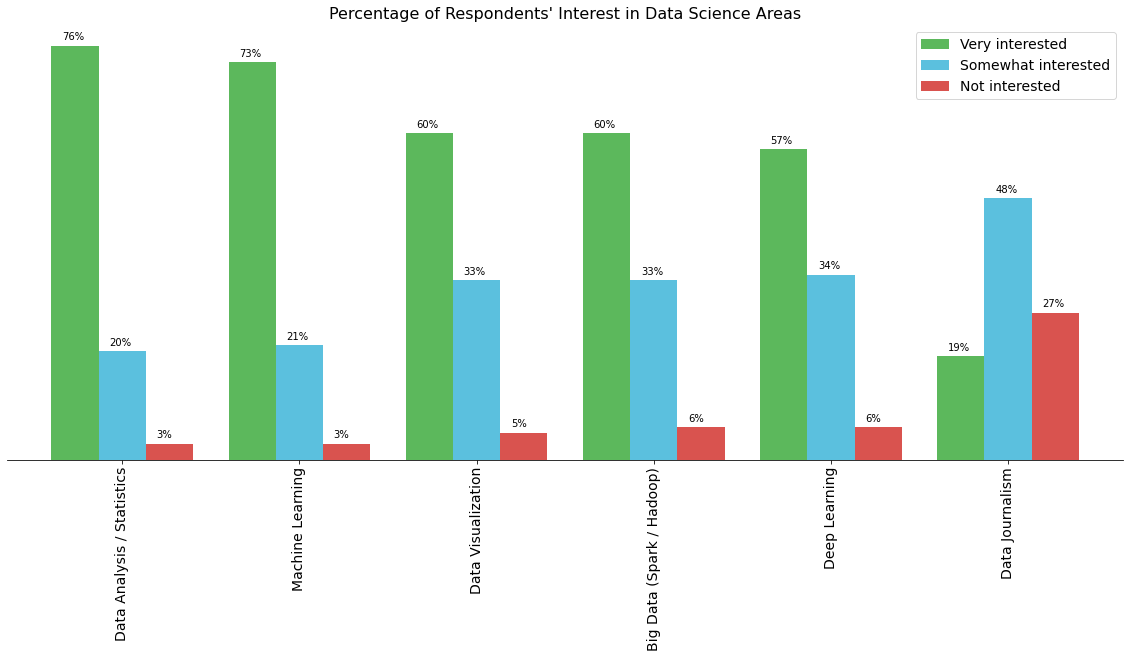

In [57]:
import matplotlib.pyplot as plt
df_svy1.sort_values(by='Very interested',ascending=False,inplace=True)
df_svy= (df_svy1 / 2233).round(2)
chrt= df_svy.plot(kind='bar',figsize=(20,8),width=0.8,color=['#5cb85c','#5bc0de','#d9534f'])
chrt.set_xticklabels(list(df_svy.index), fontsize=14)
chrt.set_yticklabels([],fontsize=14)
chrt.yaxis.set_tick_params(length=0)
chrt.legend(fontsize=14)
chrt.set_title('Percentage of Respondents\' Interest in Data Science Areas',fontsize=16)
for crt in chrt.patches:
    x, y = crt.get_xy() 
    w, h = crt.get_width(), crt.get_height()
    chrt.annotate('{:.0%}'.format(h), (x + .06, y + h + 0.01))
chrt.spines['left'].set_visible(False)
chrt.spines['right'].set_visible(False)
chrt.spines['top'].set_visible(False)

In [75]:
df_sf=pd.read_csv('https://cocl.us/sanfran_crime_dataset')
df_sf2=df_sf.groupby('PdDistrict').agg({'IncidntNum': 'count'}).reset_index()
df_sf2.columns=['Neighborhood','Count']
df_sf2

Neighborhood  Count
0      BAYVIEW  14303
1      CENTRAL  17666
2    INGLESIDE  11594
3      MISSION  19503
4     NORTHERN  20100
5         PARK   8699
6     RICHMOND   8922
7     SOUTHERN  28445
8      TARAVAL  11325
9   TENDERLOIN   9942

In [68]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\eutsaga\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         184 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         152 KB  conda-forge
    conda-4.8.3                |   py36h9f0ad1d_1         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       he774522_0         5.7 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\eutsaga\AppData\Local\Continuum\anaconda3\pkgs\notebook-6.0.3-py37_0.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\Users\eutsaga\AppData\Local\Continuum\anaconda3\pkgs\notebook-6.0.3-py37_0\Lib\site-packages\notebook\static\components\MathJax\jax\output\SVG\fonts\STIX-Web\Main\BoldItalic\Main.js.  Please remove this file manually (you may need to reboot to free file handles)


In [78]:
import folium
sfo_geo = r'C:\Users\eutsaga\Downloads\san-francisco.json'
sfo_map = folium.Map(location=[37.77, -122.42], zoom_start=12)
sfo_map.choropleth(geo_data=sfo_geo,data=df_sf2,columns=['Neighborhood', 'Count'],key_on='feature.properties.DISTRICT',fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.2,
    legend_name='Crime Rate in San Francisco')
sfo_map